## Big Data Mart Sales Problem
Problem Statement:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [8]:
#Importing Train data 

df_train = pd.read_csv('bigdatamart_Train.csv')
df_train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
#Importing Test data 

df_test = pd.read_csv('bigdatamart_Test.csv')
df_test.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [12]:
# Info on data sets
print('train_data \n',df_train.shape)
print ('\n test data \n',df_test.shape)

train_data 
 (8523, 12)

 test data 
 (5681, 11)


### Outlet sales , is the label to be calcuated


In [13]:
# Check the datatypes
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical :
Item_Identifier,
Item_Fat_Content,
Item_Type,
Outlet_Identifier,
Outlet_Size,
Outlet_Location_Type,
Outlet_Type

In [21]:
# statistical description of the features and the target.
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [26]:
# get the unique values of each of the columns
df_train.describe(include=['O'])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDG33,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [53]:
# Data Correlation
df_train_corr= df_train.corr()
df_train_corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<AxesSubplot:>

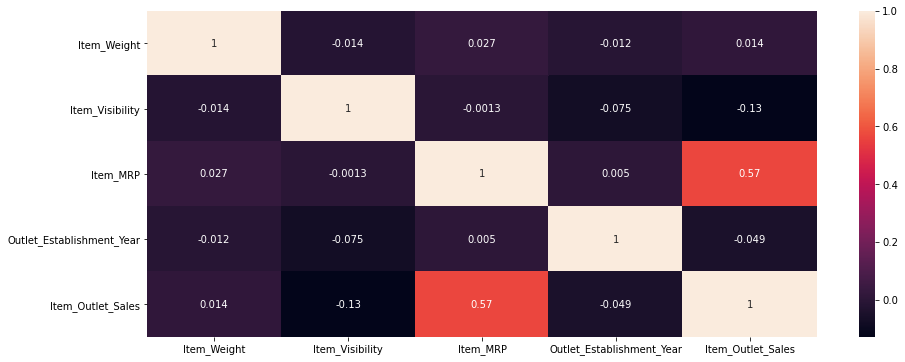

In [55]:
plt.figure(figsize=(15,6))
sns.heatmap(df_train_corr, annot=True)

In [ ]:
# there are total of 1559 item in the datset
# There are 16 types of items
# There are 10 Outlet for the mart
# There are 3 tpyes of outlet and 4 sizes of outlet 

In [28]:
# get the unique values of each of the columns
df_train.apply(lambda x : len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [30]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

<AxesSubplot:>

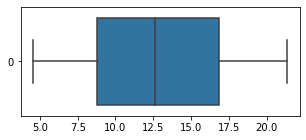

In [45]:
#Boxplot 
plt.figure(figsize =(5,2))
sns.boxplot(data=df_train['Item_Weight'],orient='h')


<AxesSubplot:>

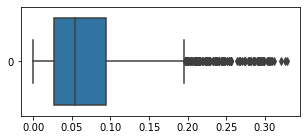

In [46]:
plt.figure(figsize =(5,2))
sns.boxplot(data=df_train['Item_Visibility'],orient='h')

<AxesSubplot:>

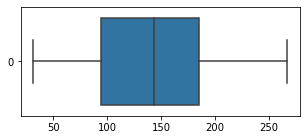

In [47]:
plt.figure(figsize =(5,2))
sns.boxplot(data=df_train['Item_MRP'],orient='h')

<AxesSubplot:>

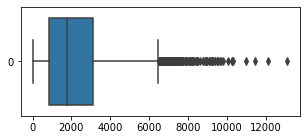

In [48]:
plt.figure(figsize =(5,2))
sns.boxplot(data=df_train['Item_Outlet_Sales'],orient='h')

#### the features item visibility and Item outlet sales are seen with too much of Outliers

Checking for Nulls

In [16]:
df_train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [18]:
df_test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [50]:
# there are 2 columns with missing data in the dataset..
# The columns are : 1. Outlet_Size(1606) and 2. Item_Weight(976)
df_train.isna().mean()*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Weight'>

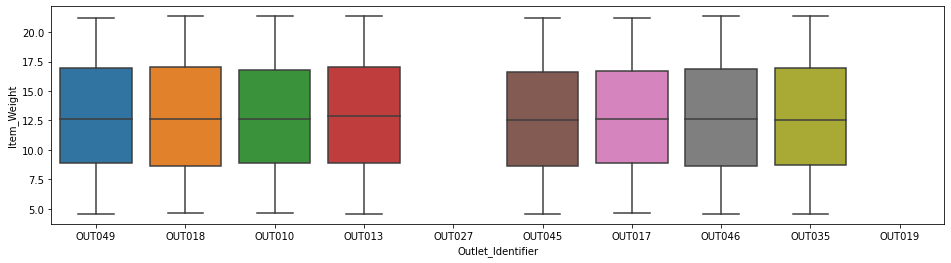

In [57]:
plt.figure(figsize=(16,4))
sns.boxplot(df_train['Outlet_Identifier'],df_train['Item_Weight'])

In [ ]:
#Data missinng for two outlets

In [59]:
df_train['Item_Weight'] = df_train['Item_Weight'].fillna(df_train.groupby('Item_Identifier')['Item_Weight'].transform('mean'))

In [63]:
df_train['Item_Weight'] = df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean())

In [64]:
df_train.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [66]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [68]:
# from Outlet size

df_train[df_train['Outlet_Size'].isna()]['Outlet_Type'].value_counts()

Supermarket Type1    1855
Grocery Store         555
Name: Outlet_Type, dtype: int64

In [ ]:
#The outlet size is missing from the Supermarket type1 or Grocery stores

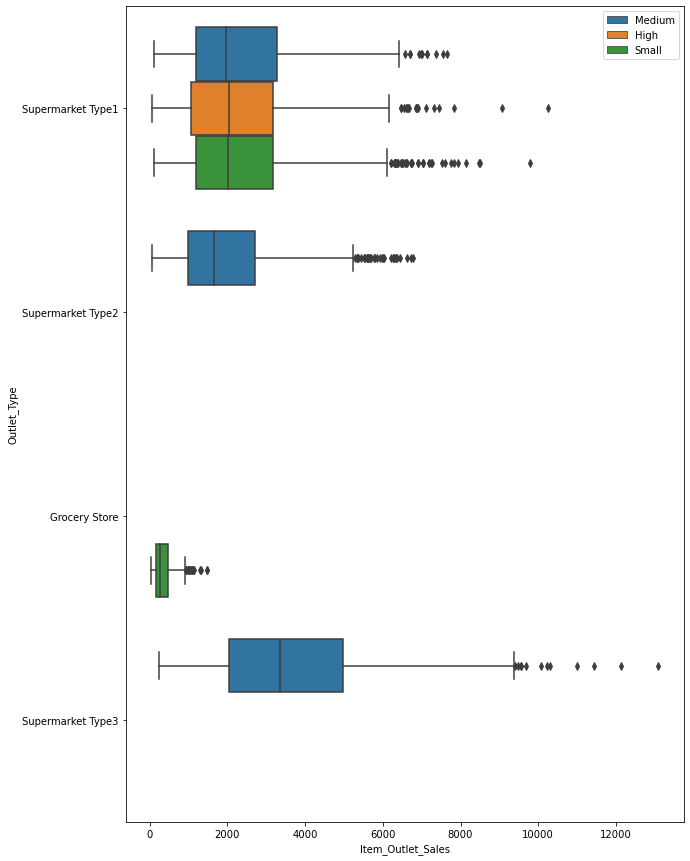

In [80]:
plt.figure(figsize=(10,15))
sns.boxplot(df_train['Item_Outlet_Sales'],df_train['Outlet_Type'],hue=df_train['Outlet_Size'])
plt.legend(bbox_to_anchor=(1,1))

In [ ]:
#Grocery Store  is small and ST1 is having more med type 

In [82]:
# Thus replacinf NUll as Small and Medium for Gorcery and Supermrkets 

for i in range(len(df_train)):
    if pd.isna(df_train.loc[i,'Outlet_Size']):
        if df_train.loc[i,'Outlet_Type'] == 'Grocery Store':
            df_train.loc[i,'Outlet_Size'] = 'Small'
        else:
            df_train.loc[i,'Outlet_Size'] = 'Medium'

In [89]:
df_train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
#Also if we see minimum value for Item_Visibilityis 0, which is not  practically possible we can consider them as NAN only 

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

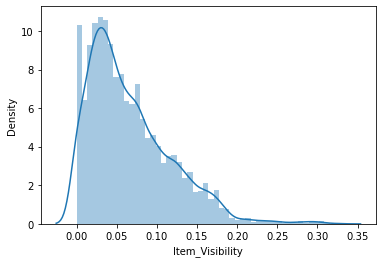

In [91]:
# distribution of the Item_Visibility feature
sns.distplot(df_train['Item_Visibility'])

In [95]:
# removing the last 1 percentile of observation wrt the quantile_item_visibility feature 

quantile_item_visibility = df_train['Item_Visibility'].quantile(0.98)

df_cleaned = df_train[df_train['Item_Visibility']<quantile_item_visibility]

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

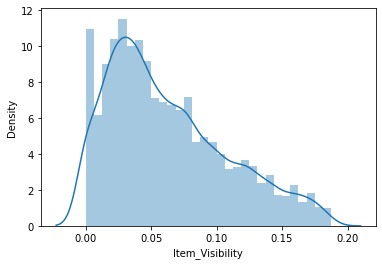

In [96]:
# distribution of the Item_Visibility feature
sns.distplot(df_cleaned['Item_Visibility'])

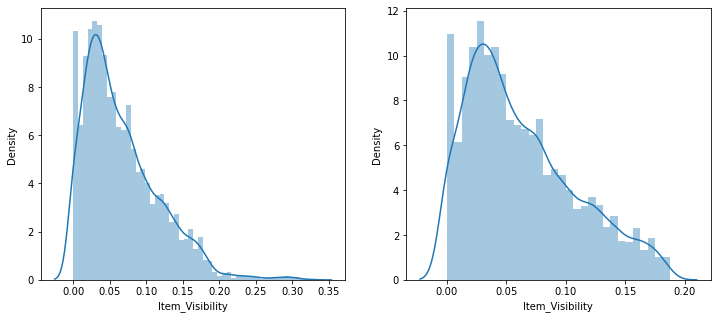

In [104]:
fig = plt.figure(figsize=(12,5))

fig.add_subplot(121)
sns.distplot(df_train['Item_Visibility'])
fig.xlabel='Item_Visibility-orig'

fig.add_subplot(122)
sns.distplot(df_cleaned['Item_Visibility'])
fig.xlabel='Item_Visibility-cleaned'
fig.show()

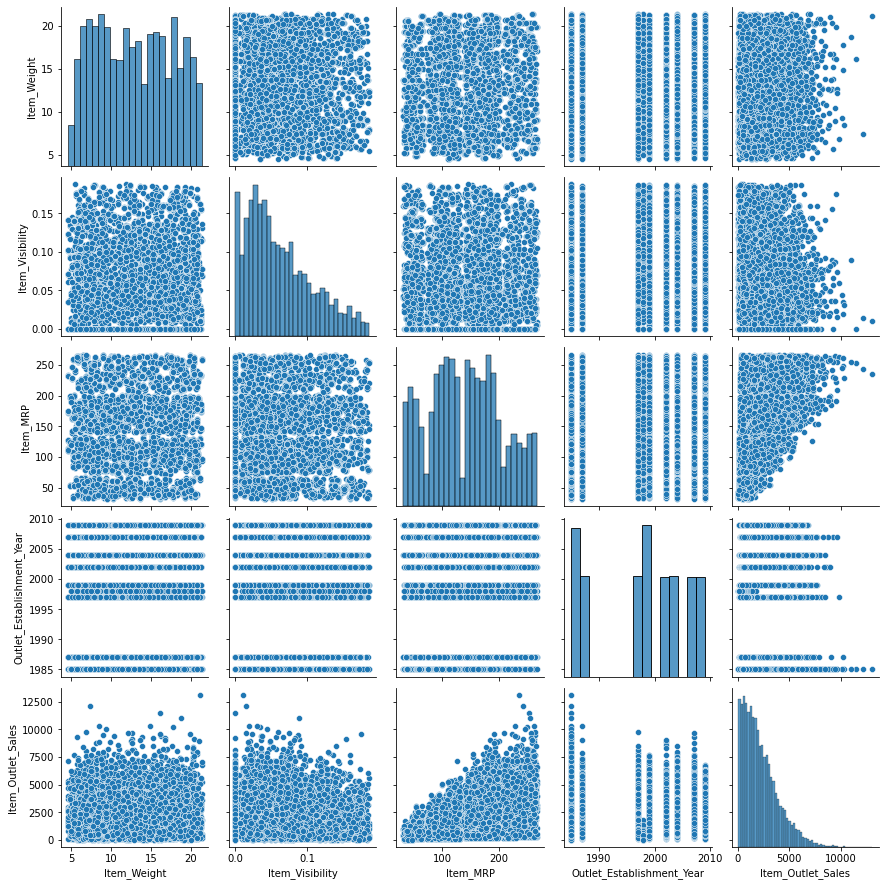

In [105]:
sns.pairplot(df_cleaned)

In [ ]:
# Almost all of the outliers are removed in the cleaned dataframe

In [106]:
# check the skewness of the clenaed dataframe
df_cleaned.skew()

Item_Weight                  0.067299
Item_Visibility              0.721341
Item_MRP                     0.128564
Outlet_Establishment_Year   -0.415894
Item_Outlet_Sales            1.171019
dtype: float64

In [107]:
# head of the cleaned dataframe
df_cleaned.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [108]:
df_cleaned['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.080766      2
0.076792      2
0.080625      2
           ... 
0.092576      1
0.115168      1
0.146896      1
0.081119      1
0.027617      1
Name: Item_Visibility, Length: 7710, dtype: int64

In [109]:
# let's replace the 0 with Nan values
df_cleaned['Item_Visibility'] = df_cleaned['Item_Visibility'].replace(to_replace=0,value=np.nan)

In [110]:
df_cleaned.isna().sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility              526
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

In [132]:
df_cleaned['Item_Visibility'] = df_cleaned['Item_Visibility'].fillna(df_cleaned.groupby('Item_Type')['Item_Visibility'].transform('mean'))

In [134]:
df_cleaned.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.50,1,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.20,2,0.069767,6,182.0950,OUT010,1998,2,2,0,732.3800
4,NCD19,8.93,1,0.062054,9,53.8614,OUT013,1987,0,2,1,994.7052


In [ ]:
# Column to  be  encoded are : 
# 1. Item_fat_content
# 2. Outlet size
# 3. Outlet Location type
# 4. OUtlet type
# 5. Item_Type

In [127]:
#Data Manipulation 
from sklearn.preprocessing import LabelEncoder
lab_enc =LabelEncoder()
# Categorical data will not have any outliers 

df_cleaned['Item_Fat_Content'] = lab_enc.fit_transform(df_cleaned['Item_Fat_Content'])

 # feature encoding complete completed 

In [128]:
df_cleaned['Outlet_Size']  = lab_enc.fit_transform(df_cleaned['Outlet_Size'])
df_cleaned['Outlet_Location_Type']  = lab_enc.fit_transform(df_cleaned['Outlet_Location_Type'])
df_cleaned['Outlet_Type']  = lab_enc.fit_transform(df_cleaned['Outlet_Type'])
df_cleaned['Item_Type']  = lab_enc.fit_transform(df_cleaned['Item_Type'])

In [133]:
df_cleaned.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
## Train Test Split 
### Setting X and y axis and splitting the data into train and test respectively.

In [135]:
df_cleaned.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,1,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.920,2,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.500,1,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.200,2,0.069767,6,182.0950,OUT010,1998,2,2,0,732.3800
4,NCD19,8.930,1,0.062054,9,53.8614,OUT013,1987,0,2,1,994.7052
5,FDP36,10.395,2,0.069258,0,51.4008,OUT018,2009,1,2,2,556.6088
6,FDO10,13.650,2,0.012741,13,57.6588,OUT013,1987,0,2,1,343.5528
7,FDP10,19.000,1,0.127470,13,107.7622,OUT027,1985,1,2,3,4022.7636
8,FDH17,16.200,2,0.016687,5,96.9726,OUT045,2002,1,1,1,1076.5986
9,FDU28,19.200,2,0.094450,5,187.8214,OUT017,2007,1,1,1,4710.5350


In [138]:
# Train Test Split 
# Setting X and y axis and splitting the data into train and test respectively.
x = df_cleaned.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Item_Outlet_Sales'],axis =1)
y = df_cleaned['Item_Outlet_Sales']

In [140]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [141]:
x.skew(0)

Item_Weight             0.067299
Item_Fat_Content        1.004314
Item_Visibility         0.785636
Item_Type               0.099625
Item_MRP                0.128564
Outlet_Size            -0.208332
Outlet_Location_Type   -0.213705
Outlet_Type             0.963517
dtype: float64

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
my_acc = 0
rs = 0
for i in range (1,100) :
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=.3,random_state=i)   
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred =lr.predict(x_test)
    acc= r2_score(y_test,y_pred)
    if acc>my_acc :
        my_acc =acc
        rs=i  
rs

30

In [147]:
#Thus SPlitting data 

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=30)   # 30 is best 

In [145]:
#Using  Regression models 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_y_pred = lr.predict(x_test)
R2_lr_score =r2_score(y_test,lr_y_pred)

print('R2_SCORE:',R2_lr_score)
print('Mean Absolute Error_LR:',mean_absolute_error(y_test,lr_y_pred))
print('Mean Squared Error_LR:', mean_squared_error(y_test,lr_y_pred))
print('Root Mean Squared Error_LR:', np.sqrt(mean_squared_error(y_test,lr_y_pred)))

R2_SCORE: 0.5338461828339538
Mean Absolute Error_LR: 866.8983475138238
Mean Squared Error_LR: 1294402.4128578953
Root Mean Squared Error_LR: 1137.7180726603121


In [164]:
#Using  XGB models 
import xgboost as  xgb
xgb = xgb.XGBRegressor()
xgb.fit(x_train,y_train)
xgb_y_pred = xgb.predict(x_test)
R2_xgb_score =r2_score(y_test,xgb_y_pred)
R2_xgb_score
print('R2_SCORE:',R2_xgb_score)
print('Mean Absolute Error_XGB:',mean_absolute_error(y_test,xgb_y_pred))
print('Mean Squared Error_XGB:', mean_squared_error(y_test,xgb_y_pred))
print('Root Mean Squared Error_XGB:', np.sqrt(mean_squared_error(y_test,xgb_y_pred)))

R2_SCORE: 0.528441127165624
Mean Absolute Error_XGB: 808.3366395790338
Mean Squared Error_XGB: 1309411.0148280582
Root Mean Squared Error_XGB: 1144.2949859315377


In [150]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt =dt.predict(x_test)
R2_DT_score =r2_score(y_test,y_pred_dt)
print('R2_SCORE_DT:',R2_DT_score)
print('Mean Absolute Error_DT:',mean_absolute_error(y_test,y_pred_dt))
print('Mean Squared Error_DT:', mean_squared_error(y_test,y_pred_dt))
print('Root Mean Squared Error_DT:', np.sqrt(mean_squared_error(y_test,y_pred_dt)))


R2_SCORE_DT: 0.16652844713874604
Mean Absolute Error_DT: 1066.566433998404
Mean Squared Error_DT: 2314359.658429512
Root Mean Squared Error_DT: 1521.3019616202143


In [151]:
# USING SVM Regression
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)
svr_y_pred = svr.predict(x_test)
R2_svr_score =r2_score(y_test,svr_y_pred)
R2_svr_score
print('R2_SCORE:',R2_svr_score)
print('Mean Absolute Error_LR:',mean_absolute_error(y_test,svr_y_pred))
print('Mean Squared Error_LR:', mean_squared_error(y_test,svr_y_pred))
print('Root Mean Squared Error_LR:', np.sqrt(mean_squared_error(y_test,svr_y_pred)))


R2_SCORE: 0.06899503364913706
Mean Absolute Error_LR: 1198.4124461574938
Mean Squared Error_LR: 2585187.6150098755
Root Mean Squared Error_LR: 1607.8518635153785


In [152]:
from sklearn.model_selection import cross_val_score 
#Cross Validation 
cvLR =cross_val_score(lr,x,y,cv=5)
cvXGB =cross_val_score(xgb,x,y,cv=5)
cvSVR=cross_val_score(svr,x,y,cv=5)
cvDTR=cross_val_score(dt,x,y,cv=5)
print ('\n CV score LR',cvLR.mean())
print ('\n CV score XGB',cvXGB.mean())
print ('\n CV score SVR',cvSVR.mean())
print ('\n CV score DTR',cvDTR.mean())


 CV score LR 0.5040684670151527

 CV score XGB 0.5150979001367355

 CV score SVR 0.19778058229491807

 CV score DTR 0.1577821185539851


In [158]:
from sklearn.model_selection import GridSearchCV




In [166]:
param ={'max_depth':range(1,15,2),'learning_rate' : np.arange(0.1,1,0.1), 'min_child_weight':range (1,6,2)}

SyntaxError: invalid syntax (<ipython-input-166-a84adbe0d687>, line 1)

In [176]:
param_1= {'learning_rate':[0.1, 0.5],
    'max_depth':[5, 10, 15], 
    'n_estimators':[100, 500, 1000],
    'gamma':[0.05, 0.5] }

In [177]:
GSV = GridSearchCV(xgb,param_1,cv=5)
GSV.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=4,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
      

In [178]:
GSV.best_params_

{'gamma': 0.05, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [197]:
# Treating test data as train data 
#1. handling NAN values in columns
#2 handling Item visibility
#3. Handling outliers
#4. Label encoding 
#5  Scaling data



In [180]:
df_test['Item_Weight'] = df_test['Item_Weight'].fillna(df_test.groupby('Item_Identifier')['Item_Weight'].transform('mean'))

In [182]:
df_test['Item_Weight'] = df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean())

In [184]:
for i in range(len(df_test)):
    if pd.isna(df_test.loc[i,'Outlet_Size']):
        if df_test.loc[i,'Outlet_Type'] == 'Grocery Store':
            df_test.loc[i,'Outlet_Size'] = 'Small'
        else:
            df_test.loc[i,'Outlet_Size'] = 'Medium'

In [192]:
df_test_cleaned.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [186]:
quantile_item_visibility_test = df_test['Item_Visibility'].quantile(0.98)

df_test_cleaned = df_test[df_test['Item_Visibility']<quantile_item_visibility_test]


In [189]:
df_test_cleaned['Item_Visibility'] = df_test_cleaned['Item_Visibility'].replace(to_replace=0,value=np.nan)

In [191]:
df_test_cleaned['Item_Visibility'] = df_test_cleaned['Item_Visibility'].fillna(df_test_cleaned.groupby('Item_Type')['Item_Visibility'].transform('mean'))


In [193]:

from sklearn.preprocessing import LabelEncoder
lab_enc =LabelEncoder()
# Categorical data will not have any outliers 

df_test_cleaned['Item_Fat_Content'] = lab_enc.fit_transform(df_test_cleaned['Item_Fat_Content'])
df_test_cleaned['Outlet_Size']  = lab_enc.fit_transform(df_test_cleaned['Outlet_Size'])
df_test_cleaned['Outlet_Location_Type']  = lab_enc.fit_transform(df_test_cleaned['Outlet_Location_Type'])
df_test_cleaned['Outlet_Type']  = lab_enc.fit_transform(df_test_cleaned['Outlet_Type'])
df_test_cleaned['Item_Type']  = lab_enc.fit_transform(df_test_cleaned['Item_Type'])

In [195]:
xt = df_test_cleaned.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis =1)

In [196]:
xt_scaled = scaler.fit_transform(x)

In [208]:
#Using  XGB models 
import xgboost as  xgb
xgb = xgb.XGBRegressor(gamma =0.05, learning_rate= 0.1, max_depth= 5, n_estimators= 100)
xgb.fit(x_train,y_train)
xgb_yt_pred = xgb.predict(xt_scaled)
df_test_cleaned['Calculated Sales'] = xgb_yt_pred

### Saving the model

In [206]:
#Dumping the model 
import joblib as jl
jl.dump(xgb,'big_mart_prob.pk')

['big_mart_prob.pk']

In [207]:
#Loading Model
bgmp = jl.load('big_mart_prob.pk')

In [209]:
df_test_cleaned.to_csv('Bigmaet_predict.csv')